In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.model_selection

In [326]:
data = pd.read_csv('Social_Network_Ads.csv')
print(data.describe())
data

            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [327]:
label = sklearn.preprocessing.LabelEncoder()

data.Gender = label.fit_transform(data.Gender)

X = data.iloc[:,[1,2,3]]
Y = data.iloc[:,-1]
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [328]:
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(X,Y,test_size=.30,random_state=5)

In [329]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [330]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=5)
model.fit(x_train,y_train,)

LogisticRegression(random_state=5)

In [331]:
prediction = model.predict(x_test)
df = pd.DataFrame(prediction,y_test)
df

,0
Purchased,
0,1
0,0
0,0
0,0
0,0
...,...
0,0
0,0
0,0


In [332]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction)
cm

array([[72,  6],
       [10, 32]], dtype=int64)

In [333]:
ok = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])*100
ok

86.66666666666667

[Text(0.4770408163265306, 0.9545454545454546, 'x[1] <= 0.645\n0.461\n280\n[179, 101]'),
 Text(0.26785714285714285, 0.8636363636363636, 'x[2] <= 0.608\n0.285\n203\n[168, 35]'),
 Text(0.09183673469387756, 0.7727272727272727, 'x[1] <= -0.127\n0.08\n167\n[160, 7]'),
 Text(0.07142857142857142, 0.6818181818181818, '0.0\n109\n[109, 0]'),
 Text(0.11224489795918367, 0.6818181818181818, 'x[2] <= 0.104\n0.212\n58\n[51, 7]'),
 Text(0.04081632653061224, 0.5909090909090909, 'x[2] <= 0.045\n0.046\n42\n[41, 1]'),
 Text(0.02040816326530612, 0.5, '0.0\n33\n[33, 0]'),
 Text(0.061224489795918366, 0.5, 'x[0] <= 0.029\n0.198\n9\n[8, 1]'),
 Text(0.04081632653061224, 0.4090909090909091, '0.0\n5\n[5, 0]'),
 Text(0.08163265306122448, 0.4090909090909091, 'x[1] <= 0.162\n0.375\n4\n[3, 1]'),
 Text(0.061224489795918366, 0.3181818181818182, '0.0\n3\n[3, 0]'),
 Text(0.10204081632653061, 0.3181818181818182, '0.0\n1\n[0, 1]'),
 Text(0.1836734693877551, 0.5909090909090909, 'x[2] <= 0.134\n0.469\n16\n[10, 6]'),
 Text(0.1

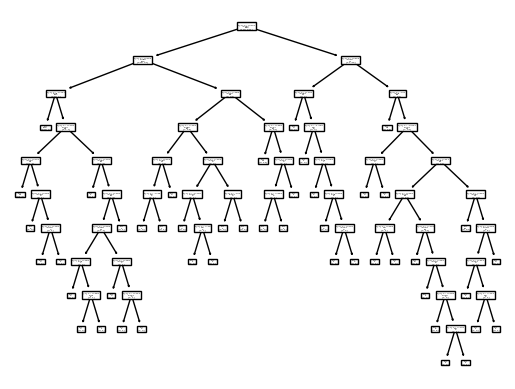

In [334]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
tree.plot_tree(dtree,label=['gender','age','salary'])

In [337]:
tpredict = dtree.predict(x_test)
tm = confusion_matrix(y_test,tpredict)
tm

array([[71,  7],
       [ 7, 35]], dtype=int64)

In [338]:
ok = (tm[0][0]+tm[1][1])/(tm[0][0]+tm[0][1]+tm[1][0]+tm[1][1])*100
ok


88.33333333333333